In [1]:
import os,sys
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import progressbar
from pylab import *

In [2]:
df_resized = pd.read_csv('2trainLabels_cropped')
df_resized.set_index(['image','level'],inplace=True)
df_resized.head()

,,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1
image,level,,,
13_left,0.0,2,2.0,2.0
22_left,0.0,16,16.0,16.0
31_right,0.0,25,25.0,25.0
33_right,0.0,27,27.0,27.0
41_left,0.0,32,32.0,32.0


In [3]:
len(df_resized)

14108

In [4]:
def get_images_vectors():
    X_list = []
    Y_list = []
    k = 0
    with progressbar.ProgressBar(max_value=len(df_resized)) as bar:
        for i,j in df_resized.index:
            imagen = Image.open("resized_train/"+i+".jpeg")
            rzs= imagen.resize((350,350))
            arr_rzs=array(rzs.convert('L'))
            arr_res=arr_rzs.reshape(122500)
            X_list.append(arr_res)
            Y_list.append(j)
            k += 1
            bar.update(k)
        return np.array(X_list),np.array(Y_list)

In [5]:
X,Y= get_images_vectors()

100% (14108 of 14108) |##################| Elapsed Time: 0:06:19 Time:  0:06:19


In [6]:
print(X.shape,Y.shape)

(14108, 122500) (14108,)


In [7]:
df_X = pd.DataFrame(X)

In [8]:
df_Y = pd.DataFrame(Y)

In [9]:
df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,122490,122491,122492,122493,122494,122495,122496,122497,122498,122499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
lista_indices=[]
for i in range (122500):
    np_arr = np.array(df_X[i])
    if int(np.mean(np_arr)) <= 10:
        lista_indices.append(i)

In [11]:
len(lista_indices)

15710

In [12]:
df_X.drop(lista_indices,axis=1,inplace= True)

In [13]:
df_X.head()

,71,72,73,74,75,76,77,78,79,80,...,122422,122423,122424,122425,122426,122427,122428,122429,122430,122431
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,0,4,110,118,115,116,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,9,9,14,20,54,115,141,155,154,...,159,161,164,151,147,146,146,154,150,149


In [14]:
X_prueba = np.array(df_X)

In [15]:
import pylab as pl
from sklearn.decomposition import PCA

In [16]:
n_components = 100

In [17]:
print("Extracting the top %d components from %d images" %(n_components, X_prueba[:13000,:].shape[0]))
pca = PCA(n_components=n_components,svd_solver='randomized',whiten=True)

%time pca.fit(X_prueba[:13000,:])


Extracting the top 100 components from 13000 images
Wall time: 7min 2s


PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=True)

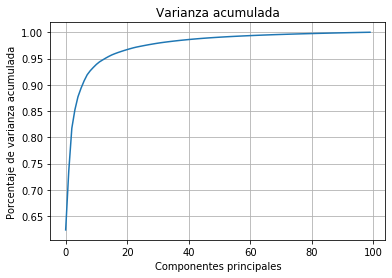

In [18]:
plt.plot(np.cumsum(pca.explained_variance_/np.sum(pca.explained_variance_)))
plt.title('Varianza acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza acumulada')
plt.grid()

In [22]:
X_pca = pca.transform(X_prueba)

In [23]:
np.savetxt('X_features_2',X_pca,delimiter=',')

In [24]:
np.savetxt('Y_labels_2',Y,delimiter=',')

In [25]:
X_pca.shape

(14108, 100)

In [26]:
Y.shape

(14108,)